# Generatives Trainig mit DeepHull und Max-Distanz loss, generatives und normales Netz trainieren unabhängig voneinander
falls noch kein ICNN Netz exisitiert, kann eins gelernt werden, indem man init auf True setzt

In [1]:
import numpy as np
import torch

from script.Networks import ICNN
from script.Networks import SequentialNN
from torch.utils.data import DataLoader
from script.dataInit import ConvexDataset, Rhombus
from script.trainFunction import train_icnn_adversarial, train_icnn
from script.eval import Plots_for


In [2]:
icnn = ICNN([2, 10, 10, 1])
adversarial = SequentialNN([2, 10, 10, 2])
epochs = 30
batch_size = 10

number_of_adversarial_samples = 10000
number_of_train_samples = 10000
hyper_lambda = 1
x_range = [-1.5, 1.5]
y_range = [-1.5, 1.5]

init = False

In [3]:
true_extremal_points = Rhombus().get_extremal_points()
if init:
    included_space, ambient_space = Rhombus().get_uniform_samples(number_of_train_samples, x_range, y_range) #samples will be split in inside and outside the rhombus
    dataset = ConvexDataset(data=included_space)
    train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    dataset = ConvexDataset(data= ambient_space)
    ambient_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

    random_samples = []
    for i in range(number_of_adversarial_samples): # generate random samples
        x = np.random.default_rng().uniform(low=x_range[0], high=x_range[1])
        y = np.random.default_rng().uniform(low=y_range[0], high=y_range[1])
        random_samples.append([[x, y]])

    value = torch.tensor(random_samples, requires_grad=True, dtype=torch.float64)
    adversarial_set = ConvexDataset(data=value)
    adversarial_loader = DataLoader(adversarial_set, batch_size=batch_size, shuffle=True)

if init:
    torch.save(ambient_space, "../../ambient_space.pt")
    torch.save(included_space, "../../included_space.pt")
    torch.save(value, "../../value.pt")
else:
    icnn.load_state_dict(torch.load("../../icnn.pt"), strict=False)
    ambient_space = torch.load("../../ambient_space.pt")
    included_space = torch.load("../../included_space.pt")
    value = torch.load("../../value.pt")
    dataset = ConvexDataset(data=included_space)
    train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    dataset = ConvexDataset(data=ambient_space)
    ambient_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    adversarial_set = ConvexDataset(data=value)
    adversarial_loader = DataLoader(adversarial_set, batch_size=batch_size, shuffle=True)

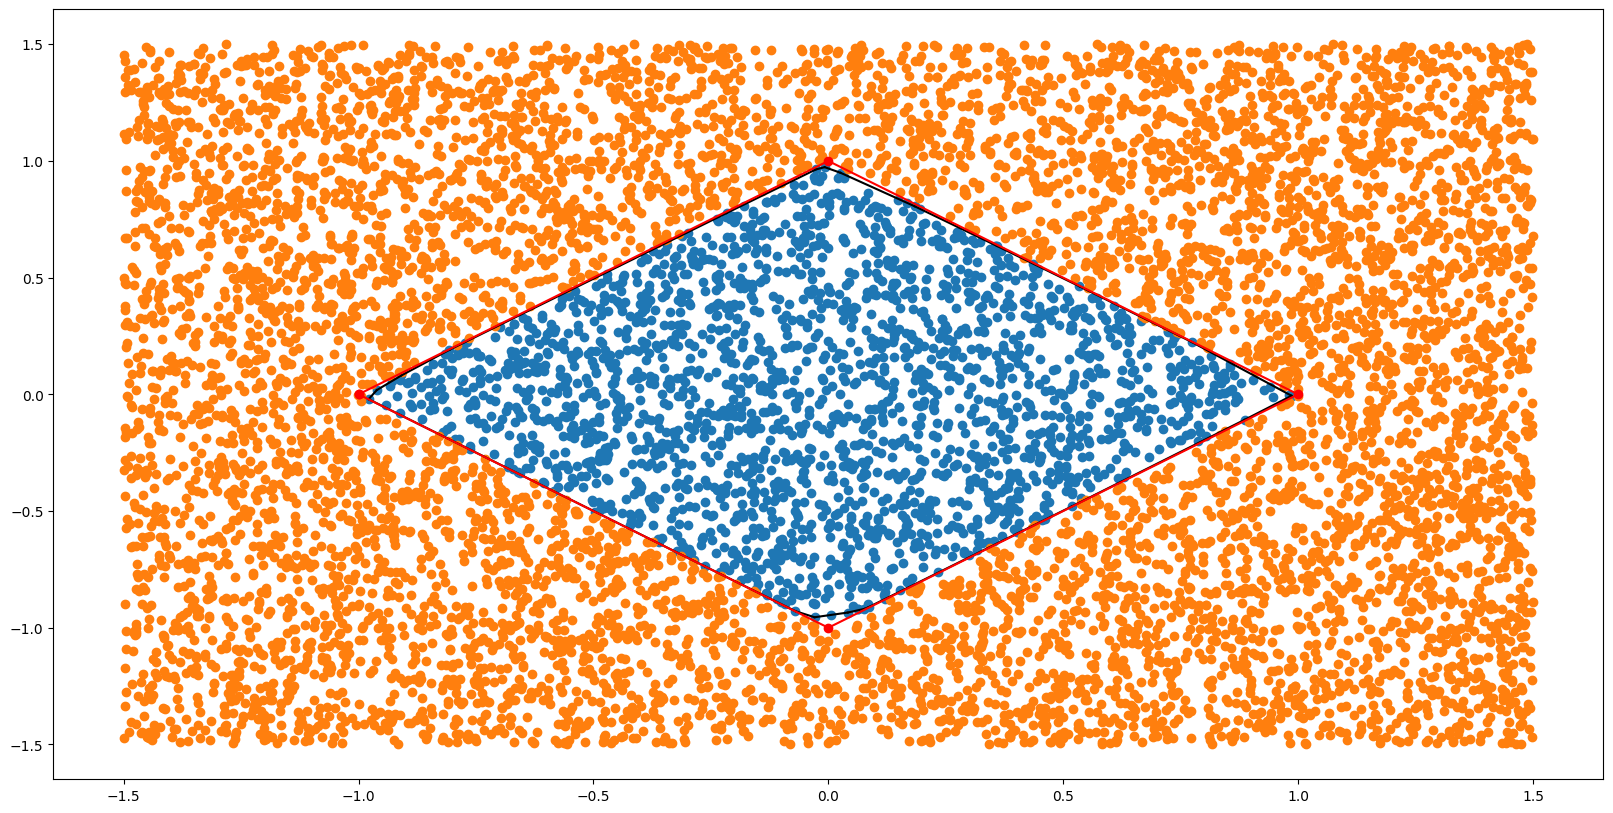

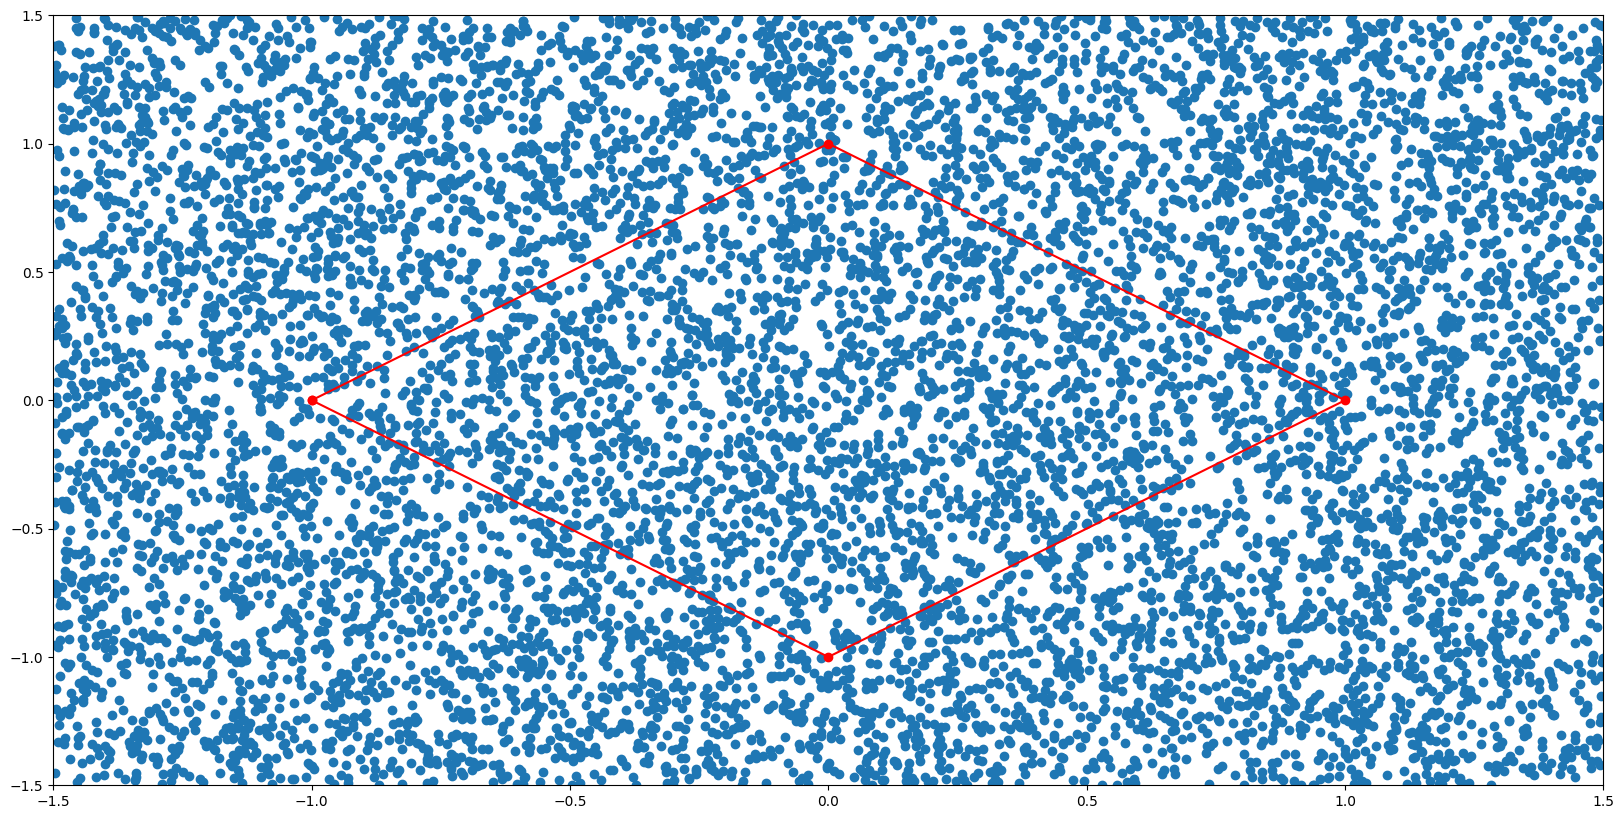

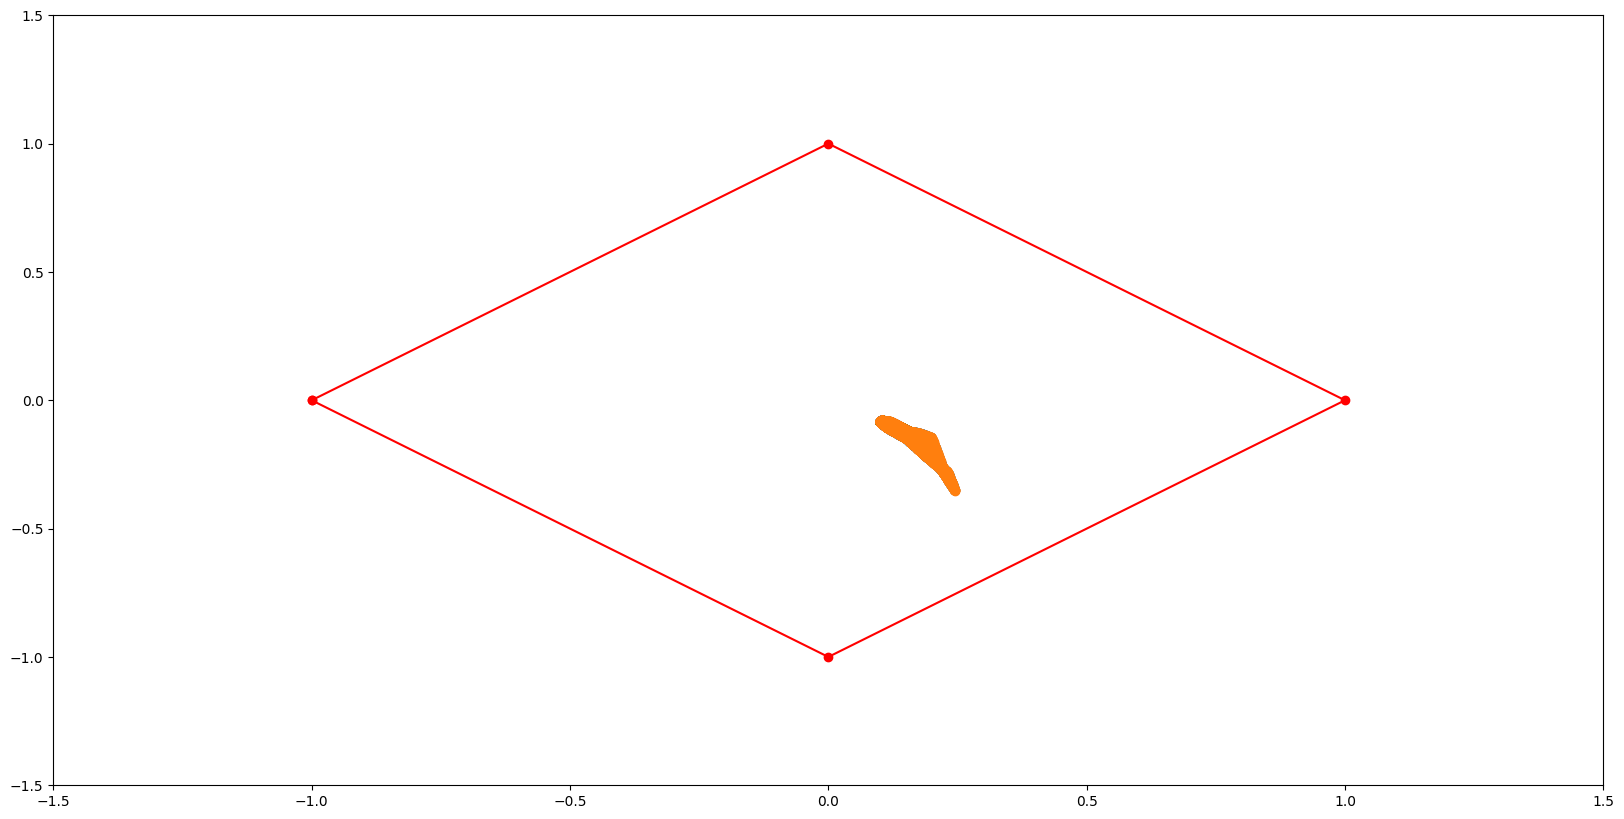

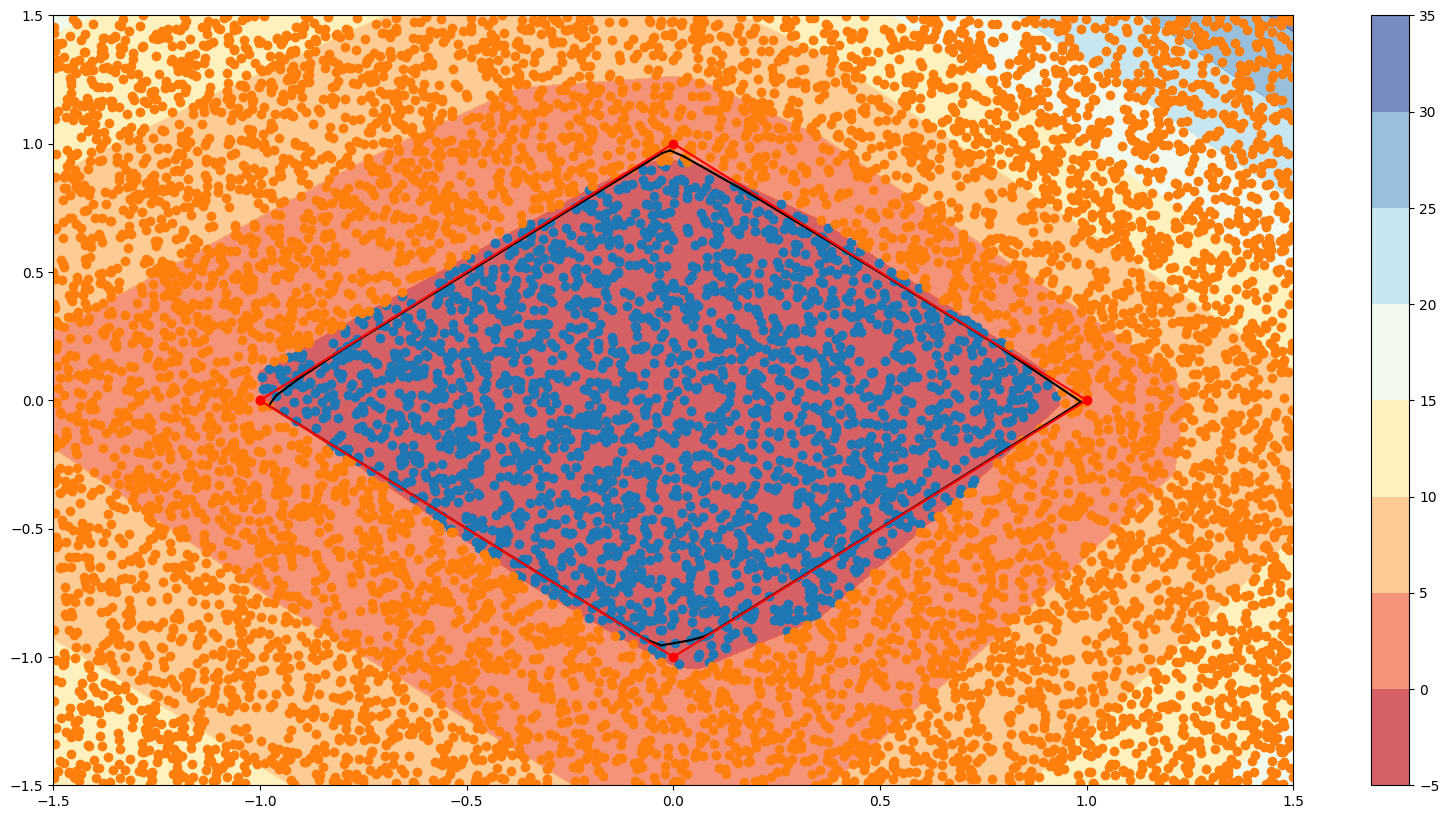

In [4]:
plots = Plots_for(0, icnn, included_space, ambient_space, true_extremal_points, x_range, y_range, adversarial=adversarial, adversarial_values=value)
plots.plt_initial()

plots.plt_adversarial_initial()
plots.plt_adversarial_dotted()

if init:
    history = train_icnn(icnn, train_loader, ambient_loader, epochs=epochs, hyper_lambda=hyper_lambda)
    torch.save(icnn.state_dict(), "../../icnn.pt")
plots.plt_mesh()

=== Epoch: 0===
batch = 0, mean loss = 15.059925079345703, l_pos = 0.2260875701904297, l_neg = 0.0, l_gen = 14.833837509155273
batch = 100, mean loss = 13.385301287811581, l_pos = 0.19717954718830563, l_neg = 0.0, l_gen = 13.188121748442697
batch = 200, mean loss = 12.08556660134994, l_pos = 0.19599939986544462, l_neg = 0.0, l_gen = 11.88956720674809
batch = 221, mean loss = 11.86080802943372, l_pos = 0.19591142142789936, l_neg = 0.0, l_gen = 11.66489661333248
=== Epoch: 1===
batch = 0, mean loss = 10.179100036621094, l_pos = 0.1546250283718109, l_neg = 0.0, l_gen = 10.02447509765625
batch = 100, mean loss = 9.224550639048662, l_pos = 0.19557101375395708, l_neg = 0.0, l_gen = 9.028979660260795
batch = 200, mean loss = 8.850125362623983, l_pos = 0.19627047949169404, l_neg = 0.0, l_gen = 8.653854901517802
batch = 221, mean loss = 8.759784159077778, l_pos = 0.19591142351810747, l_neg = 0.0, l_gen = 8.563872745134173
=== Epoch: 2===
batch = 0, mean loss = 9.489174842834473, l_pos = 0.19187

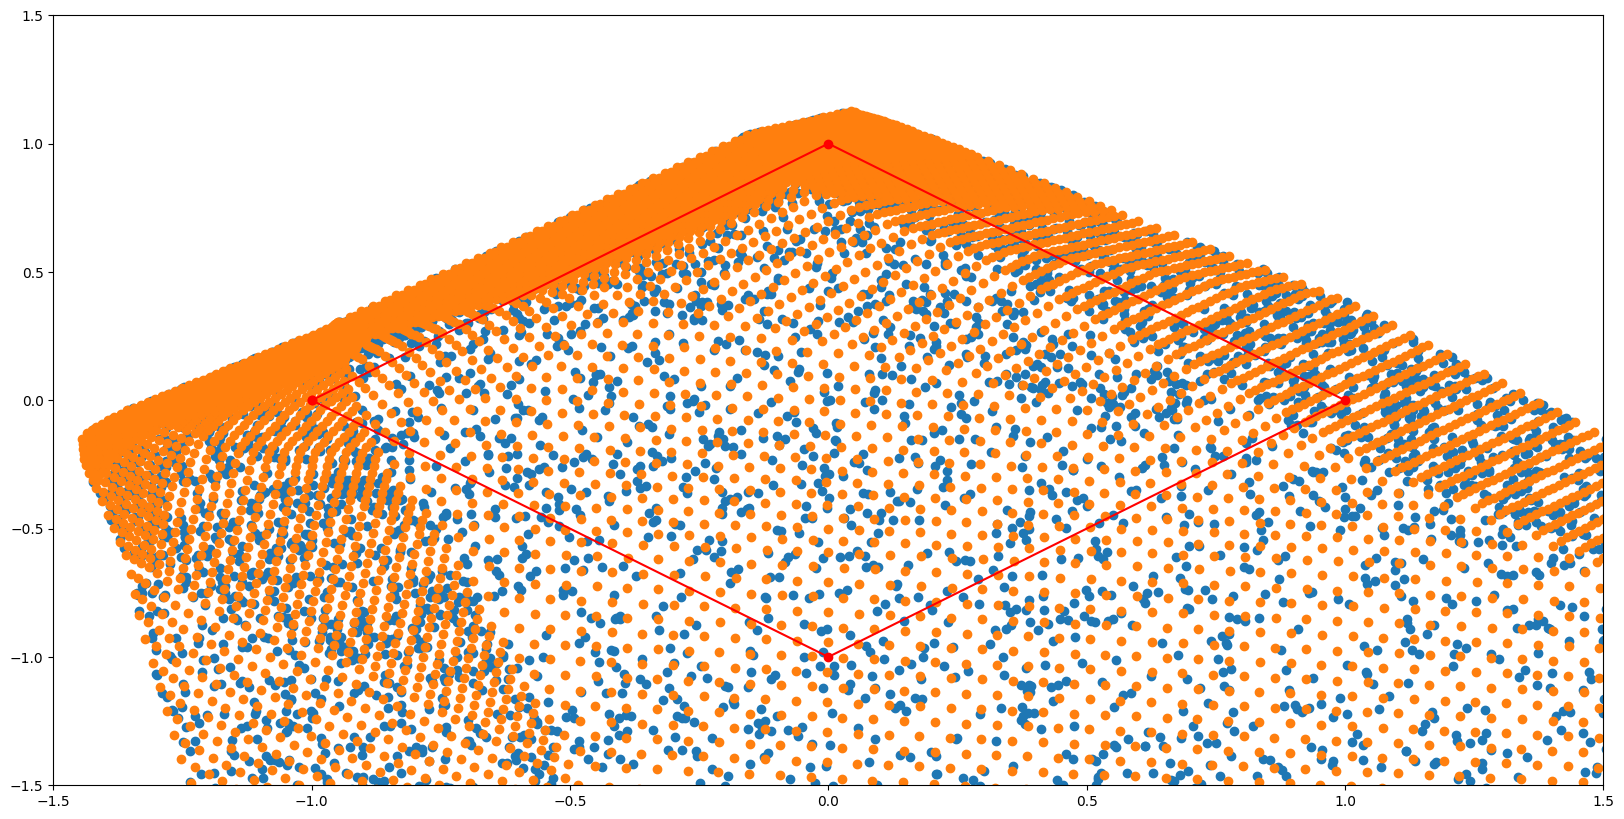

=== Epoch: 0===
batch = 0, mean loss = 6.7265753746032715, l_pos = 0.23921892046928406, l_neg = 0.0, l_gen = 6.487356662750244
batch = 100, mean loss = 6.982888457798722, l_pos = 0.1974453102834154, l_neg = 0.0, l_gen = 6.785443169055599
batch = 200, mean loss = 7.009663830942182, l_pos = 0.19668943623998272, l_neg = 0.0, l_gen = 6.812974410270577
batch = 221, mean loss = 7.026817574220545, l_pos = 0.19591142169760364, l_neg = 0.0, l_gen = 6.830906166749842
=== Epoch: 1===
batch = 0, mean loss = 6.3798370361328125, l_pos = 0.22859835624694824, l_neg = 0.0, l_gen = 6.151238918304443
batch = 100, mean loss = 7.139380544719129, l_pos = 0.19687241699435923, l_neg = 0.0, l_gen = 6.9425081262494075
batch = 200, mean loss = 7.192679846464698, l_pos = 0.1963392555417113, l_neg = 0.0, l_gen = 6.996340585585258
batch = 221, mean loss = 7.175618387455314, l_pos = 0.1959114231135511, l_neg = 0.0, l_gen = 6.979706954093001
=== Epoch: 2===
batch = 0, mean loss = 6.897380352020264, l_pos = 0.15098403

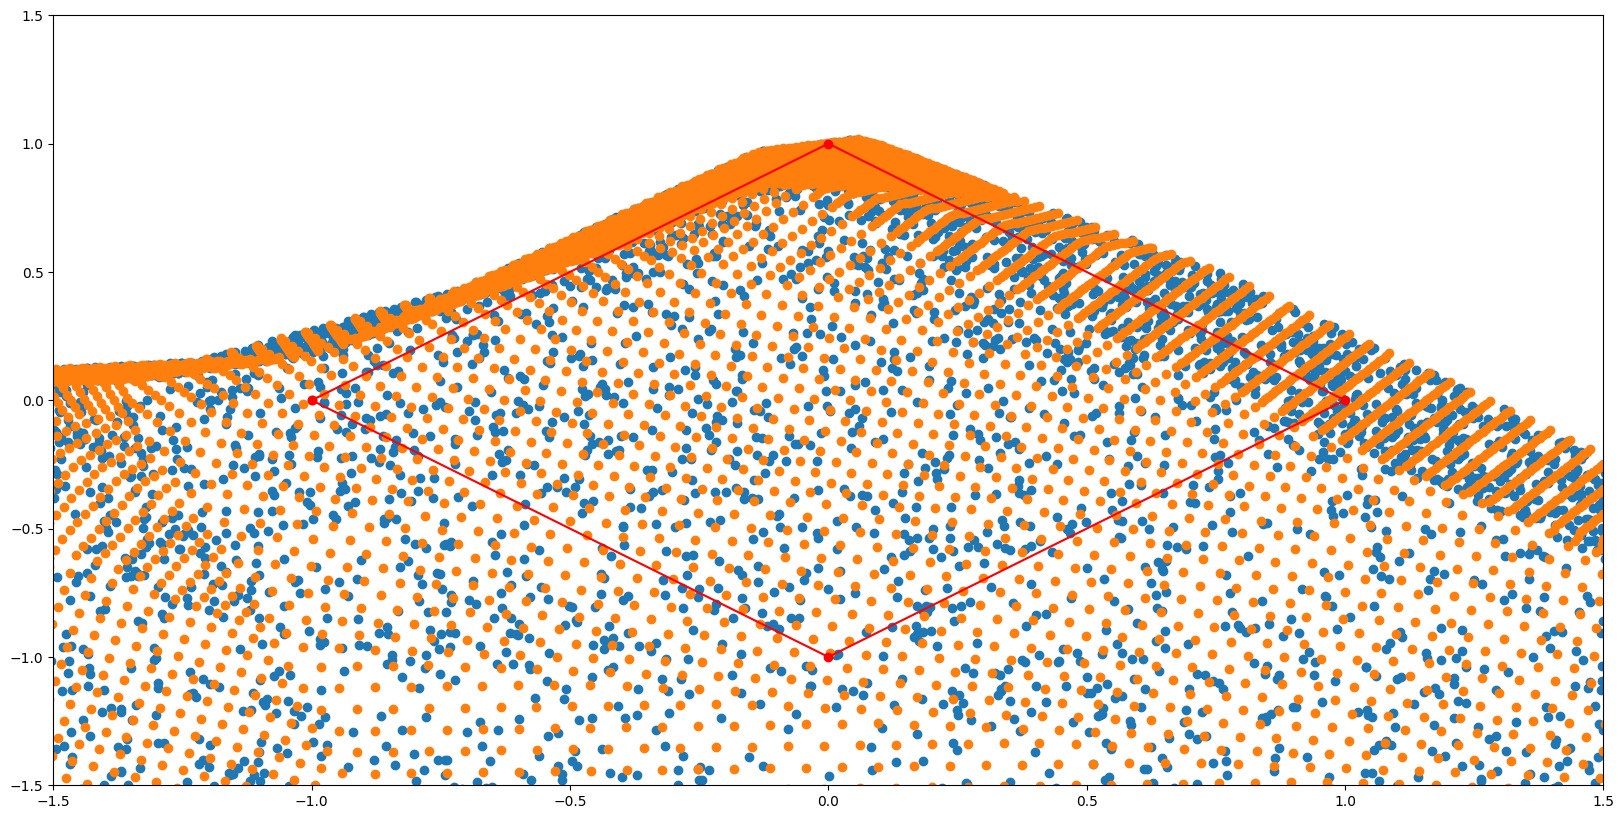

=== Epoch: 0===
batch = 0, mean loss = 6.404664993286133, l_pos = 0.15389181673526764, l_neg = 0.0, l_gen = 6.250772953033447
batch = 100, mean loss = 6.8906906194025925, l_pos = 0.2015320736877989, l_neg = 0.0, l_gen = 6.68915855766523
batch = 200, mean loss = 6.806925363208524, l_pos = 0.19639157700301402, l_neg = 0.0, l_gen = 6.610533790208807
batch = 221, mean loss = 6.84161883997162, l_pos = 0.19591142243929038, l_neg = 0.0, l_gen = 6.645707413082209
=== Epoch: 1===
batch = 0, mean loss = 7.183546543121338, l_pos = 0.24008317291736603, l_neg = 0.0, l_gen = 6.943463325500488
batch = 100, mean loss = 7.07058316882294, l_pos = 0.19619512425200775, l_neg = 0.0, l_gen = 6.874388043243106
batch = 200, mean loss = 7.027856653602562, l_pos = 0.1968871707939983, l_neg = 0.0, l_gen = 6.830969494966725
batch = 221, mean loss = 7.02024252705984, l_pos = 0.19591142183245577, l_neg = 0.0, l_gen = 6.824331117431503
=== Epoch: 2===
batch = 0, mean loss = 7.683150768280029, l_pos = 0.2692203819751

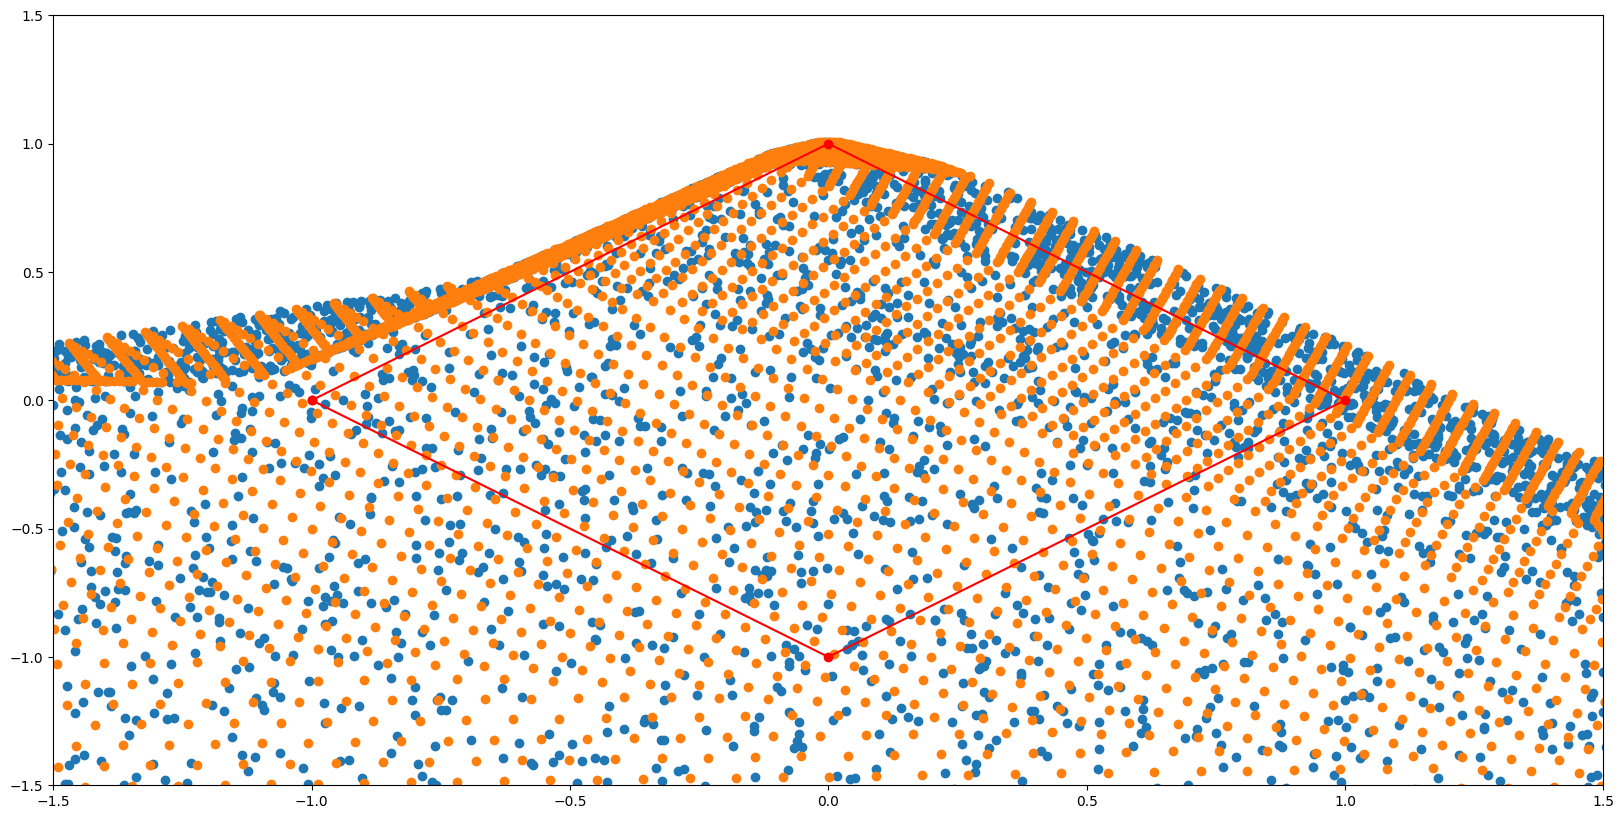

In [5]:
for i in range(int(epochs / 10)):
    history = train_icnn_adversarial(icnn, adversarial, train_loader, adversarial_loader, epochs=10, train_ICNN=False, hyper_lambda=hyper_lambda, use_max_distance=True)
    print("run {}".format(i))
    plots.plt_adversarial_dotted()